## Disability and Oil Wells in Los Angeles County
# A combination of the location of oil wells with the number and percentage of people with disabilities in nearby census tracts.

In [2]:
# first importing pandas
import pandas as pd

# Census and Disability

I first imported my 3rd assignment, starting with adding the data from the census, setting up the FIPS code, and simplifying the number of columns.

In [3]:
df = pd.read_csv('HealthCensusLA5Y2022.csv', low_memory=False,
                dtype=
                {'GEO_FIPS':str,
                })

In [4]:
#Now, we add the extra zeros to GEO_FIPS column
df['GEO_FIPS'] = df['GEO_FIPS'].str.zfill(11)

In [5]:
#Next, I selected the columns to analyze for this exercise
columns_to_keep = ['GEO_FIPS',
                   'S2701_C01_001E',
                   'S2701_C01_035E',
                   'S2701_C01_036E',
                   'S2701_C02_001E',
                   'S2701_C04_001E']                 

In [6]:
#Next, I added that information to a new dataframe
df2 = df[columns_to_keep]

I also then renamed the columns and provided a sample of the columns.

In [7]:
df2.columns = ['FIPS',
'TotalPop',
'Disabled',
'NotDiabled',
'Insured',
'Uninsured']


And now a sample of those columns

In [8]:
df2.head(5)

,FIPS,TotalPop,Disabled,NotDiabled,Insured,Uninsured
0,00000006037,9866623,1045189,8821434,8977888,888735
1,06037101110,3927,439,3488,3751,176
2,06037101122,4161,446,3715,3986,175
3,06037101220,3481,627,2854,3178,303
4,06037101221,3703,999,2704,3343,360


I also deleted the los angeles county total from the dataset in order to allow for visuals then ran info and a histogram to get a better sense of the data.

In [8]:
df2 = df2.drop(0)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 1 to 2498
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FIPS        2498 non-null   object
 1   TotalPop    2498 non-null   int64 
 2   Disabled    2498 non-null   int64 
 3   NotDiabled  2498 non-null   int64 
 4   Insured     2498 non-null   int64 
 5   Uninsured   2498 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 117.2+ KB


<Axes: ylabel='Frequency'>

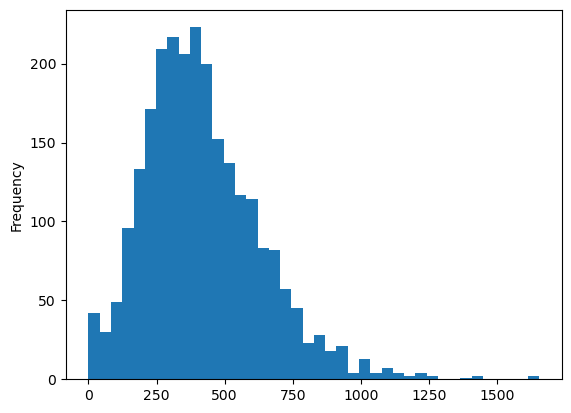

In [9]:
df2['Disabled'].plot.hist(bins=40) 

My takeaway from this was that most census tracts have between 250-500 people with disabilities, but there are outliers as high as 1500. We don't yet know how that compares to the population in the place, but it is certainly striking.

Sorting the data then seems like an important element of understanding it.

In [10]:
Tract_disability = df2.sort_values(by='Disabled',ascending = False)

In [12]:
Tract_disability[['FIPS','Disabled','TotalPop']].head(10)

,FIPS,Disabled,TotalPop
2064,06037600202,1655,7614
2089,06037601401,1646,7129
1936,06037555300,1434,4882
591,06037206303,1415,2757
2088,06037601303,1400,5593
589,06037206301,1255,2115
1819,06037543322,1252,7031
1821,06037543501,1233,6255
862,06037238000,1219,5583
864,06037238200,1219,6176


In [13]:
Tract_disability[['FIPS','Disabled','TotalPop']].tail(10)

,FIPS,Disabled,TotalPop
2477,06037980018,0,0
2460,06037980001,0,0
2461,06037980002,0,0
2472,06037980013,0,0
2471,06037980012,0,0
2462,06037980003,0,0
2468,06037980009,0,5
2466,06037980007,0,0
2465,06037980006,0,0
2498,06037990300,0,0


There are multiple census tracts with zero people with disabilities, but these are also mostly census tracts without people in Los Angeles.

Next, I moved to mapping the data, starting with importing geopandas and accessing the 2020 census tract geojson file from LA Geo HUB

In [11]:
import geopandas as gpd

In [12]:
#creating a variable for the geojson with census tracts
tracts=gpd.read_file('2020_Census_Tracts.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


I then looked for relevant geographical information that I can merge with the other dataset, by choosing the columns wer're interested in and creating a FIPS column as we did in class

In [16]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int64   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [13]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


Next, I added the information for California and Los Angeles to the CT20 column in a new FIPS column and confirmed it worked with a test of the first five rows. 

In [14]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [15]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222


In [16]:
#Now, I merge the two into one new dataframe
tracts_disability=tracts.merge(df2,on="FIPS")

In [21]:
#and confirm if it worked the way I hoped
tracts_disability.head()

,CT20,geometry,FIPS,TotalPop,Disabled,NotDiabled,Insured,Uninsured
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,3927,439,3488,3751,176
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,4161,446,3715,3986,175
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,3481,627,2854,3178,303
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3703,999,2704,3343,360
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222,2808,664,2144,2589,219


I then created another variable for the percenage of residents with a disability.

In [17]:
tracts_disability['PCT_Disability'] = tracts_disability['Disabled']/tracts_disability['TotalPop']*100

In [ ]:
Now I was about to add the next dataset I wanted to check what projection the data would be.

In [25]:
tracts_disability.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Oil Wells Data

Now, I added oil wells data for the use of pairing the two. 

In [19]:
df = pd.read_csv('Oil_Wells.csv')

In [20]:
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

A key concern for us was the size of the dataset for oil wells. As described elsewhere, we decided to narrow to active wells based on the size of the data.

In [21]:
gdf_act = gdf.drop(gdf[gdf['WellStatus'] != 'A'].index)

In [22]:
import matplotlib.pyplot as plt

Note, potentially for future reference. I started by trying to use a matplot lib map, but the result was a graph with two points very far away from each other. I wasn't sure how to fix this.

fig, ax = plt.subplots()

ax.set_aspect('equal')

gdf_act.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show();

# Folium 

In [23]:
import folium

In [46]:
#add empty folium map 
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_disability, # geo data
                  data=tracts_disability, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'PCT_Disability'], # [key, value]
                  fill_color='YlOrBr',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Population Disability (2022)').add_to(m)  

#create feature group so that business layer can be added to drop down
f2=folium.FeatureGroup(name='Oil Wells').add_to(m)

# add the businesses to the feature group
for index, row in gdf_act.iterrows():
    folium.Circle(
        radius=1,
        color="black",
        location=[row.Latitude,row.Longitude], 
        overlay=False).add_to(f2)

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)

m
m.save('PCTDisability+oil.html')

I tried a couple of approaches to add clarity to the variation of disability across census tracts with the percentile measure. I think natural breaks could potentially be the solution, but I was having trouble downloading the required library.
I created another visualization with the number of disabled people rather than percentile, which shows some of the variability, and might also be a useful measure from an understanding of the number of people exposed in areas. 

In [45]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.features.Choropleth(
                  geo_data=tracts_disability, # geo data
                  data=tracts_disability, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS','Disabled'], # [key, value]
                  fill_color='YlOrBr',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Population Disability (2022)').add_to(m)  

#create feature group so that business layer can be added to drop down
f2=folium.FeatureGroup(name='Oil Wells').add_to(m)

# add the businesses to the feature group
for index, row in gdf_act.iterrows():
    folium.Circle(
        radius=1,
        color="black",
        location=[row.Latitude,row.Longitude], 
        overlay=False).add_to(f2)

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)
m.save('RawDataDisability+oil.html')